## Health Care: Dataset on Heart Attack Possibility


**Main Objective:**

Is it possible to build a prompt that can tell if someone is high, medium, or low risk of having a heart attack and if so can be done using a heart attack prediction dataset? 

Based off of the main variables that cause a heart attack in this dataset, I wanted to challenge myself to build a learning prompt for health care individuals that specialize in cardiology. When they enter in patient heart health information they can better help people better understand how likely they are to having heart attack.In fact if doctors had a way of giving patients all of variables needed from this dataset a patient could enter in this information for themselves.  

This analysis will examine age,sex,cp,trestbps, chol,fbs,restecg, thalach, exang, oldpeak, slope, ca, thal,and target.There are 303 rows and 14 columns in the dataset

This data will be used to answer the following questions:
    
1. Which sex is more likely to have a heart attack and at what age?
2. Which of the 14 variables listed above are the main determinats that can cause a heart attack?
3. Which age group is at the highest risk of getting a heart attack?
4. Top 5 and Bottom 5 variables that can target a heart attack.

At the end a learning prompt that I built that will identify when people are high, medium, or low risk to having a heart attack based on the target variable age and and the top 10 indicators from this dataset. 

 





**First step is to import the library's:**

In [33]:
import pydotplus


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
import matplotlib.image as pltimg

import graphviz


from sklearn.tree import DecisionTreeClassifier

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

%matplotlib inline

import random
from random import shuffle

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn import tree



**Then we will read the dataset.**

In [5]:
heartattack="heart.csv"
df=pd.read_csv(heartattack)

In [6]:
print("The first 10 rows of the dataframe") 
df.head(10)

The first 10 rows of the dataframe


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## Now we will clean the dataset by removing all null values(data wrangling)



In [7]:
#Display entire dataset in terms of True or False. False=no null values, True= null values
df.isnull()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**From this visual we can see that many of the values in the dataset is not missing any values since it is represented by False**

In [8]:
# List all of the null values by grouping into categories
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**The next step is to describe the dataset in terms of count, mean, std, min, max, 1st, 2nd, and 3rd percentile.***

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


*From this display it can be said that the average age of people predicted to have a heart attack is 54. 
The highest average age is 77 and the lowest is 29. This chart also displays the 1st, 2nd, and 3rd percentile of people 
who have heart attacks. Those ages are 47, 55, and 61. **

## Heat Map Display 

*This heat map displays the variables from highest to lowest risk of someone having a heart attack. The darker red boxes are the highest indicators while the darker blue boxes are lowest.* 


<AxesSubplot:>

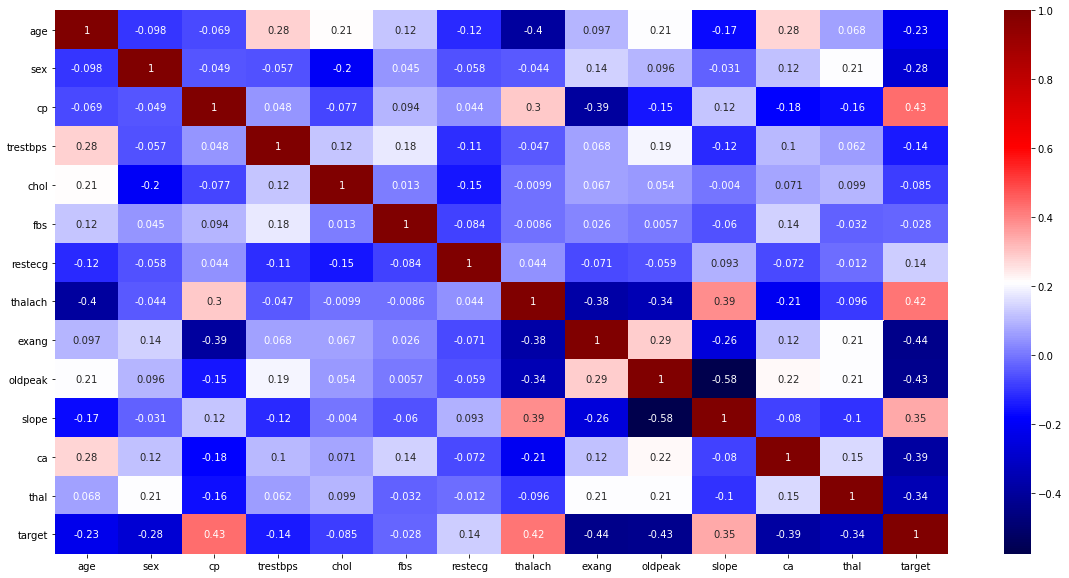

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='seismic')

**From this display it can be said that the following variables:**

1. cp, thalach, slope, restecg, and fbs are the top five variables that target one having a heart attack 

2. exang, oldpeak, ca, thal, and sex are the bottom five variables that target one having a heart attack

## The Scatter Plot

In [11]:
#This visual shows the resting heart rate (trestbps) and chol have a correlation to age. 

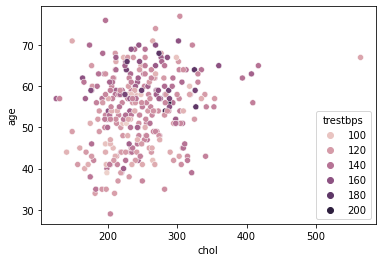

In [12]:
ax = sns.scatterplot(x='chol', y='age', hue='trestbps',
                     data=df)

*From the scatter plot below it can be seen that 0 which stands for the sex female is less likely to have a heart due to 
high chol than men. One interesting fact is that there is only one outlier above 500 for a women having a chol so high 
that it indicated a heart attack.This chart shows that sex 1 which stands for men is more likely to have a heart attack
if chol levels are between roughly 100-350 with an age range of 40-60 being the most dense for both men and women.*

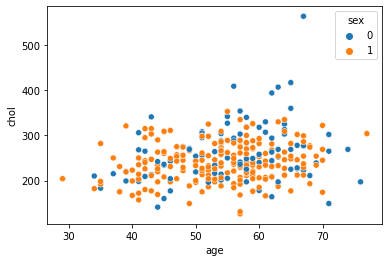

In [13]:
# sex, 0=females 1=males
ax = sns.scatterplot(x='age', y='chol', hue='sex',
                     data=df)

**This display shows that when the maximum heart rate is achieved (thalach) and chol is between 200-350, 
there is a greater chance of one having a heart attack.**

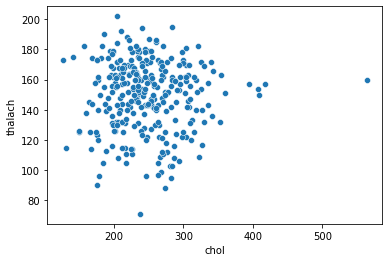

In [14]:
ax = sns.scatterplot(x='chol', y='thalach', data=df)

**This scatter plot looks at age and maxiumn heart rate. If the person is between the ages of 40-65 and the max heart rate
is above 140 there chance of a heart is at greater risk than if it was below 140 and younger than 40.**

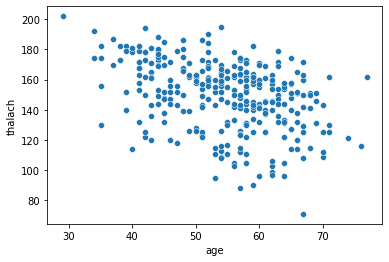

In [15]:
ax = sns.scatterplot(x='age', y='thalach', data=df)

## Box Plot 

Cp stands for constrictive pericarditis which leads to low cardic output and heart failure. According to this Box plot
A person in the beginning stage (0) may encounter a heart attack if the heart beat is around 130-160. A person in stage 
3 cp can enounter a heart attack if thalach is between 140-170. 

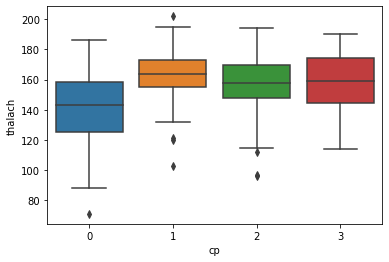

In [16]:
ax = sns.boxplot(x='cp', y='thalach', data=df)


## Historgrams 

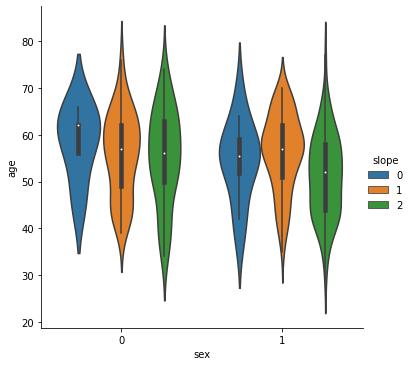

In [17]:
sns.catplot(x='sex',y= 'age', hue = 'slope', kind='violin', data=df)

## Heart Attack Prediction Prompt

Below is a prompt that tells a health care infomative using the top 10 variables in the dataset if a patient is low risk, medium risk, or high risk to having a heart attack. Health employees can put in information reguarding their age, chol, sex, thalach level, cp, treshbps, indicated slope, fbs, and more to determine if they are high risk or not. 

In [18]:
print("Please Enter Required Infomation for Heart Attack Predition: ")

Age = int(input("Age:"))
Chol=float(input("Chol:"))
Thalach= float(input("Thalach:"))
Cp= float(input("Cp:"))
Treshbps= float(input("Treshbps:"))
Slope=float(input("Slope:"))
fbs=float(input("fbs:"))
Thal= float(input("Thal:"))
Ca= float(input("Ca:"))
Restecg=float(input("Restecg:"))  


 # Converting outputs of the patients
Ages=(Age)
Chols=(Chol)
Thalachs=(Thalach)
Cps=(Cp)
Treshbpss=(Treshbps)
Slopes=(Slope)
fbss=(fbs)
Thals=(Thal)
Cas=(Ca)
Restecgs=(Restecg)  


            
#heartattack predition information 
mediumlow= 47
highrisk= 54
lowmedium= 61
lowlow= 46
slightlylow= 77

cpnum=0.43
thalachnum=0.42
slopenum=0.35
restecgnum= 0.14
fbsnum=-0.0028
cholnum=-0.085
treshbpsnum=-0.14
thalsnum=-0.34
canum=-0.39


#If Statements based on age 

print("Results of Heart Attack Prediction based age. ")

if Ages <= mediumlow and lowlow > mediumlow:
    print("Your Heart Attack Prediction rate is medium low risk based on age being", Ages)      
if mediumlow > lowlow:
    print("Your Heart Attack Prediction rate is very low risk based on age being", Ages)            
if Ages > mediumlow and highrisk>= Ages:
    print("Your Heart Attack Prediction is very high risk based on age being", Ages)            
if Ages >= slightlylow:
    print("Your Heart Attack Prediction is slightly low risk due to age being", Ages)    
if Ages <= lowmedium and highrisk < Ages:
    print("Your Heart Attack Prediction is medium risk due to age",Ages)

# If statements based on top variables and age

print ("Results of cholerstol risk level:")


if Chols >= cholnum: 
    print( "highrisk") 
else:
    print("lowrisk")
    
print ("Results of Thalach risk level:")

if Thalachs >= thalachnum:
    print("highrisk") 
else:
    print("lowrisk")
    
print("Results of CP risk level:")
   
if Cps >= cpnum:
    print("highrisk") 
else:
    print("lowrisk")
    
print("Results of Treshbpss risk level:")

if Treshbpss >= treshbpsnum:
    print("highrisk") 
else:
    print("lowrisk")
    
print("Results of Slope based on target:")

if Slopes>= slopenum:
    print("highrisk") 
else:
    print("lowrisk")
    
print("Results of Fbs risk level:")

if fbss >= fbsnum:
    print("highrisk")
else:
    print("lowrisk")
    
print("Results of Thal risk level:")

if Thals>= thalsnum:
    print("highrisk") 
else:
    print("lowrisk")
    
print("Results of Ca risk level:")

if Cas >= canum:
    print("highrisk") 
else:
    print("lowrisk")
    
print("Results of Restecgs risk level:")

if Restecgs >=restecgnum:
    print("highrisk")
else:
    print("lowrisk")
    
# Information to determine if patient is high, low, or medium risk to having a heart attack based off the top five indicators
    
print ("1. If the top five indicators of a heartattack are high and age is highrisk you are possibly at a very high chance of having a heart attack.") 
print ("2. If the top five indicators are high risk and age is low risk you may still be at a high risk of having a heart attack.")
print("3. If the top five indicators are low risk and your age is high or low risk then you are probably not at risk of having a heartattack.")
    


Please Enter Required Infomation for Heart Attack Predition: 
Age:56
Chol:0.8
Thalach:-0.89
Cp:-0.54
Treshbps:0.0099
Slope:0.0005
fbs:0.456
Thal:0.56
Ca:0.0006
Restecg:0.0678
Results of Heart Attack Prediction based age. 
Your Heart Attack Prediction rate is very low risk based on age being 56
Your Heart Attack Prediction is medium risk due to age 56
Results of cholerstol risk level:
highrisk
Results of Thalach risk level:
lowrisk
Results of CP risk level:
lowrisk
Results of Treshbpss risk level:
highrisk
Results of Slope based on target:
lowrisk
Results of Fbs risk level:
highrisk
Results of Thal risk level:
highrisk
Results of Ca risk level:
highrisk
Results of Restecgs risk level:
lowrisk
1. If the top five indicators of a heartattack are high and age is highrisk you are possibly at a very high chance of having a heart attack.
2. If the top five indicators are high risk and age is low risk you may still be at a high risk of having a heart attack.
3. If the top five indicators are lo

**MLP Classifier**

This is a model that will judge how accurate this dataset is when it comes to prediciting a heart attack 

In [47]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(32), learning_rate_init=0.001, max_iter=150)
model = MLP.fit(X, y)
MLP_predict = MLP.predict(X)
MLP_conf_matrix = confusion_matrix(y, MLP_predict)
MLP_acc_score = accuracy_score(y, MLP_predict)


#Printing the confussion matrix and accuracy scoresprint("confussion matrix")
print(MLP_conf_matrix)
print("\n")
print((y,MLP_predict))
print("Truth of Multilayer Perceptron Classifier: {:.3f}".format(MLP_acc_score*100),'%\n')

[[ 98  40]
 [ 26 139]]


(0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64, array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 

C:\Users\kierr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


**Random Forest Classifier Test**

In [53]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=500,random_state=1)
model.fit(X,y)
rfpred=model.predict(X)
RF_conf_matrix = confusion_matrix(y, rfpred)
rf_acc_score = accuracy_score(y, rfpred)

#Printing the confussion matrix and accuracy scores
print("confussion matrix")
print(RF_conf_matrix)
print(y, rfpred)
print("\n")
print("Truth of Random Forest Classifier: {:.3f}".format(rf_acc_score*100),'%\n')

confussion matrix
[[138   0]
 [  0 165]]
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


Truth of Random Forest Classifier: 100.000 %



In [51]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
model = lr.fit(X, y)
lr_predict = lr.predict(X)
lr_conf_matrix = confusion_matrix(y, lr_predict)
lr_acc_score = accuracy_score(y, lr_predict)

#Printing the confussion matrix and accuracy scores
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print(y,lr_predict)
print("Truth of Logistic Regression: {:.3f}".format(lr_acc_score*100),'%\n')

confussion matrix
[[102  36]
 [ 24 141]]


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 1]
Truth of Logistic Regression: 80.198 %



C:\Users\kierr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
